
# Empty ARF Fiber

What does the wavelength sensitivity look like for the ARF fiber without microstructures.  Here we look at the modes.

In [1]:
import numpy as np

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf
from ngsolve.webgui import Draw
from ngsolve import CF
from scipy.optimize import newton
from fiberamp.fiber.microstruct.pbg import ARF2
import matplotlib.pyplot as plt


importing NGSolve-6.2.2203-56-g47f483033


In [4]:
B = ARF2(name='fine_cladding', poly_core=True, refine=0,
         curve=8, shift_capillaries=False)

d = (B.T_cladding )* B.scale

n1, n2 = 1.00027717, 1.4388164768221814
lines = [2 * n1 * d / m * ((n2/n1)**2 - 1)**.5 for m in range(11, 21)]

# for l in lines:
#     plt.plot([l,l],[-1,1])

ModeSolver: Checking if mesh has required regions
Mesh has  25312  elements,  12682  points,  and  37993  edges.


In [10]:
t0 = B.R_cladding * B.scale
t1 = B.T_cladding * B.scale
n_air = 1.00027717
n_glass = 1.4388164768221814


In [11]:
t0, t1

(4.0774999999999995e-05, 9.999999999999999e-06)

In [15]:
A = BraggExact(ts=[t0, t1, .5*t0], mats=['air', 'glass', 'air'], 
               ns=[lambda x:n_air, lambda x:n_glass, lambda x:n_air],
              maxhs=[.2,.02, .2], wl=1.8e-6, scale=B.scale)

In [18]:
Draw(CF([n for n in A.ns]), A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [32]:
# k_low = A.k0 * A.ns[0] * A.scale
k_low, k_high = A.k0 * np.min(A.ns) * A.scale, A.k0 * np.max(A.ns) * A.scale

outer = 'h2'
Ktype = 'kappa'
nu = 1

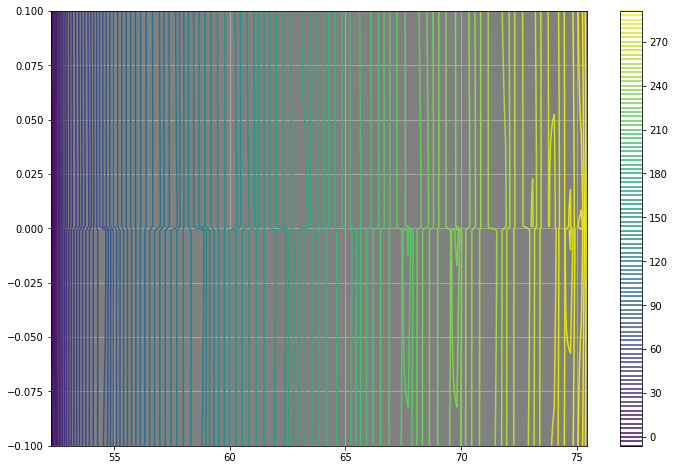

In [33]:
%matplotlib inline
plotlogf(A.determinant, k_low-.1, k_high+.1, -.1,.1, nu, outer,
         iref=100, rref=100, levels=100)

<IPython.core.display.Javascript object>


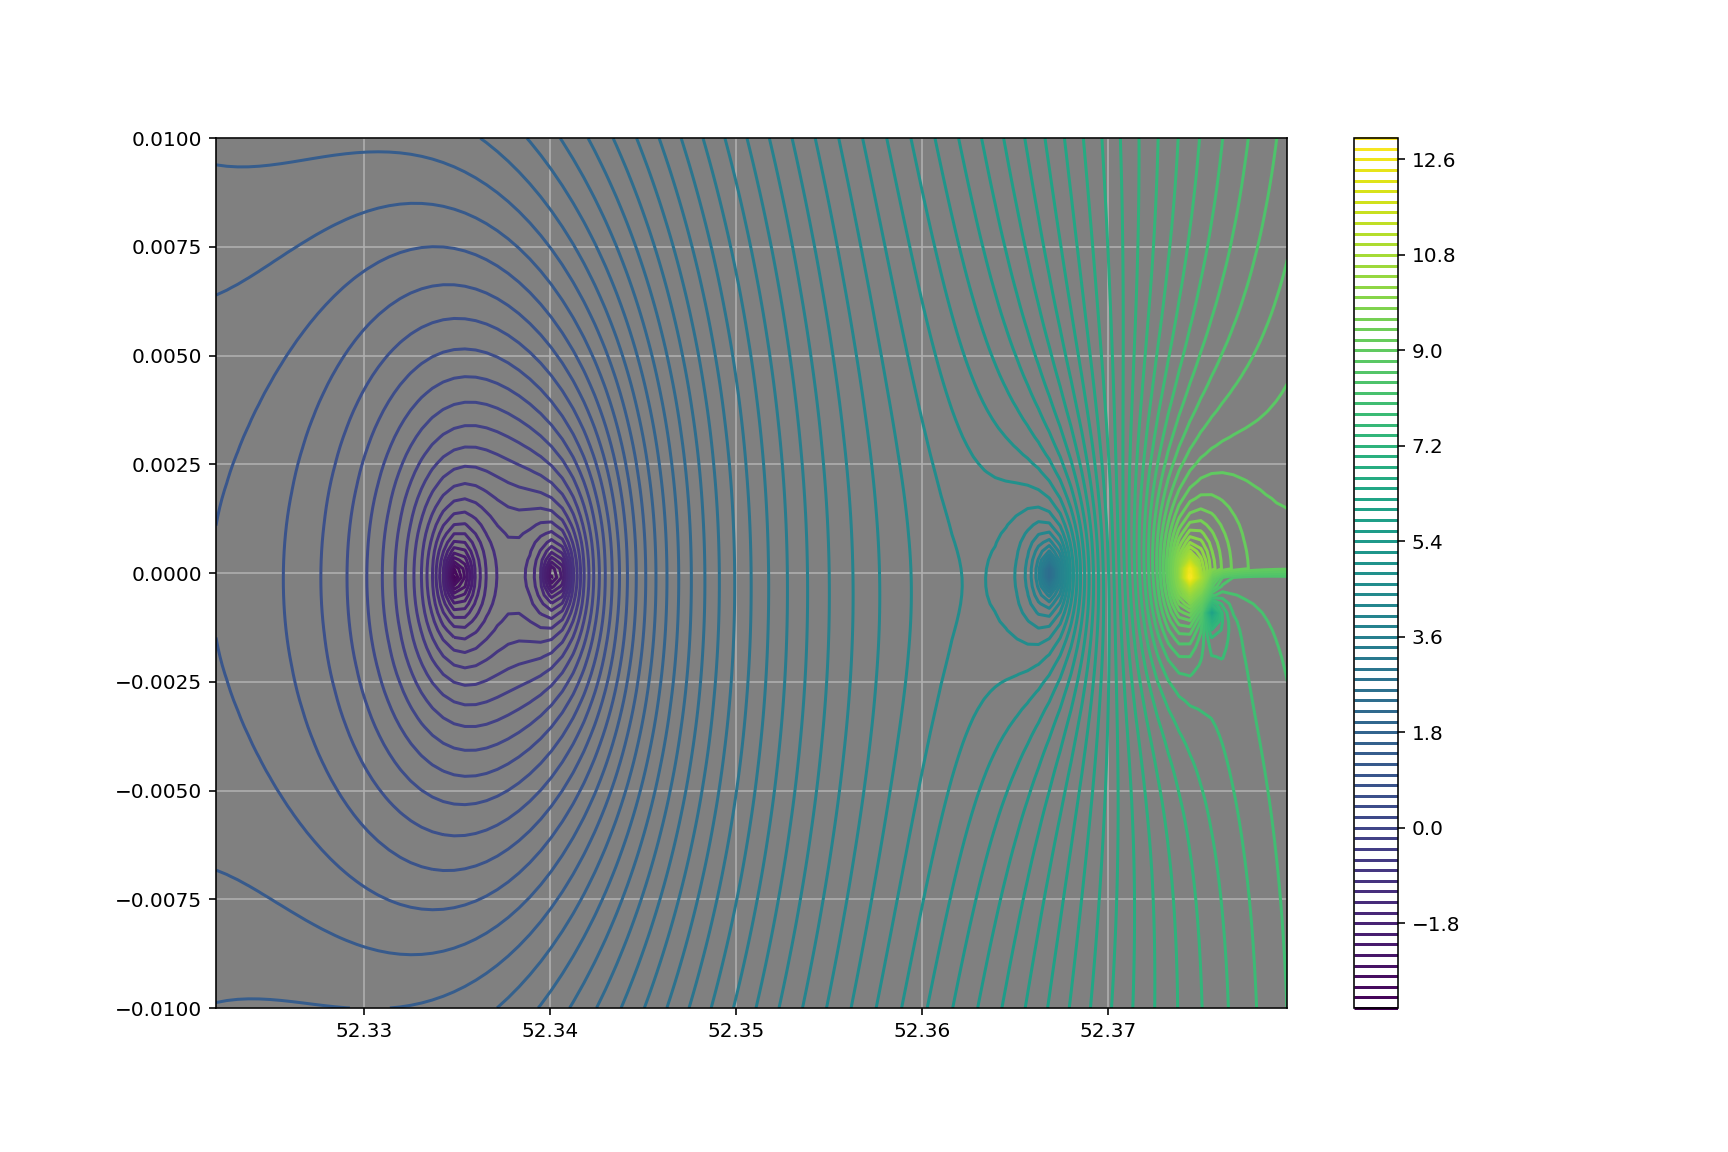

In [34]:
%matplotlib notebook
plotlogf(A.determinant, .999*k_low, 1.0001*k_low, -.01,.01, nu, outer,
         iref=100, rref=100, levels=100, figsize=(12,8))

In [35]:
guess = np.array(.9999*k_low)

beta1 = newton(A.determinant, guess, args=(nu, outer, Ktype), tol = 1e-16)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer, Ktype)))


Scaled beta:  (52.366914632524995-4.342081992361304e-06j) . Residual of determinant:  1.541761871213023e-10


# Bragg Exact Fields

In [36]:
Fs = A.all_fields(beta1, nu=nu, outer=outer, Ktype=Ktype)

In [37]:
Draw(Fs['Ez'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [27]:
Draw(Fs['Hz'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [28]:
Draw(Fs['Etv'].real, A.mesh, vectors={'grid_size':150})


WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [38]:
Draw(Fs['Ephi'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [39]:
Draw(Fs['Hphi'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

# Add Polymer layers

In [84]:
k = 1e-3
n_soft = 1.35 - k * 1j
n_hard = 1.45 - k * 1j


In [85]:
A = BraggExact(ts=[t0, t1, 30*t0, 30*t0, 5*t0], mats=['air', 'glass', 'soft', 'hard', 'air'], 
               ns=[lambda x:n_air, lambda x:n_glass, lambda x:n_soft, lambda x:n_hard,lambda x:n_air],
              maxhs=[2, .02, 2, .1, 2], wl=1.8e-6, scale=B.scale, curve=80)

In [86]:
Draw(CF([n for n in A.ns]), A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [87]:
k_low, k_high = A.k0 * np.min(A.ns) * A.scale, A.k0 * np.max(A.ns) * A.scale

outer = 'h2'
Ktype = 'kappa'
nu = 1

<IPython.core.display.Javascript object>


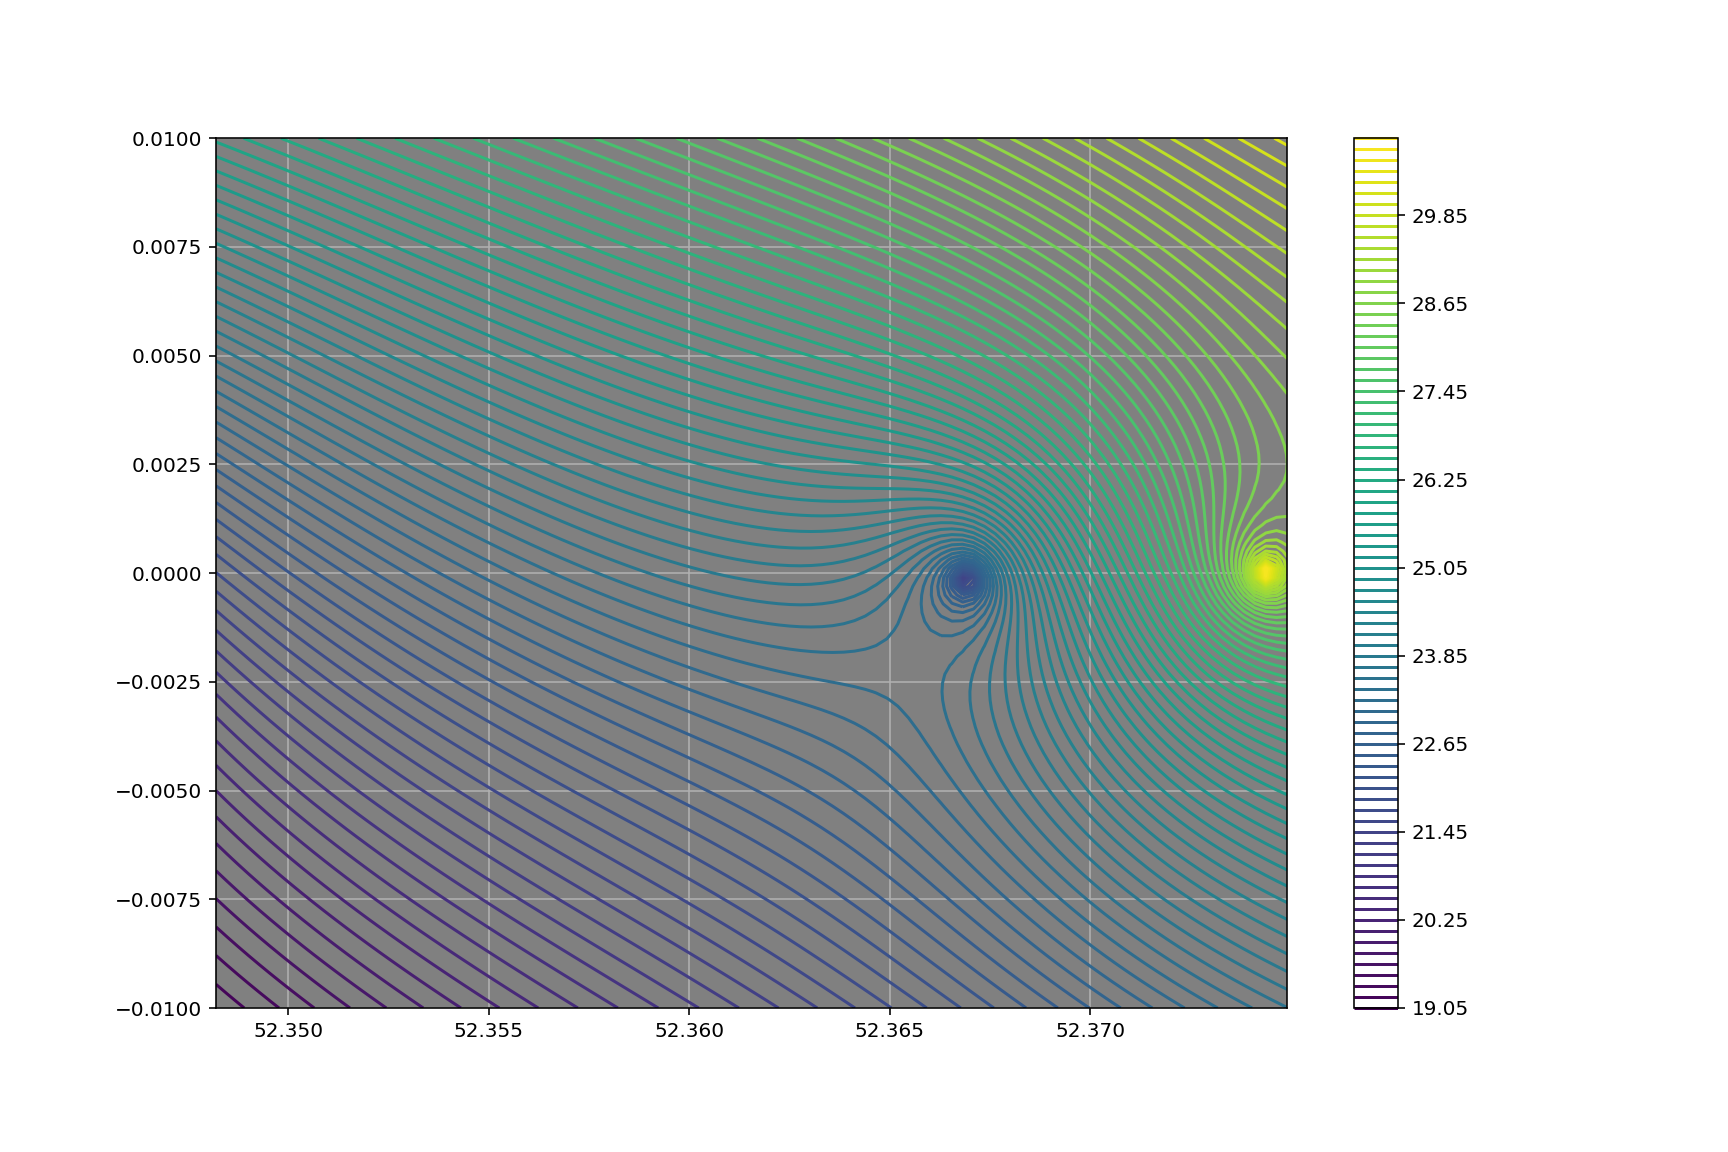

In [103]:
%matplotlib notebook
plotlogf(A.determinant, .9995*k_low, 1.00001*k_low, -.01,.01, nu, outer,
         iref=100, rref=100, levels=100, figsize=(12,8))

In [89]:
guess = np.array(.9999*k_low)

beta1 = newton(A.determinant, guess, args=(nu, outer, Ktype), tol = 1e-16)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer, Ktype)))


Scaled beta:  (52.36692029846096-0.0001490675493842692j) . Residual of determinant:  0.0699708876204737


# Bragg Exact Fields

In [90]:
Fs = A.all_fields(beta1, nu=nu, outer=outer, Ktype=Ktype)

In [91]:
Draw(Fs['Ez'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [102]:
Draw(Fs['Hz'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [93]:
Draw(Fs['Etv'].real, A.mesh, vectors={'grid_size':1500})


WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

# Looks possible to do wavelength loss study here for varying extinction coefficients in the polymer.

Hopefully not all the effect disappears at realistic values